# Multi-variate Analysis

Multivariate analysis is a branch of statistics that deals with the analysis of data involving more than one variable. It is used to understand the relationships between different variables and how they contribute to a particular phenomenon.

Here are some of the common types of multivariate analysis:

* Principal Component Analysis (PCA): This is a dimensionality reduction technique that is used to reduce the number of variables in a dataset while retaining as much of the original variation as possible. PCA is often used to visualize high-dimensional data, identify patterns, and reduce the complexity of data analysis.  It works best with continuous variables.

* Factor Analysis of Mixed Data (FAMD): This is a technique that is similar to PCA but can handle both continuous and categorical variables. FAMD is often used to analyze survey data, marketing data, and other types of mixed data.

* Multiple Correspondence Analysis (MCA): This is a technique that is used to analyze the relationships between multiple categorical variables. MCA is often used in social sciences, marketing research, and other fields where categorical data is common.

* Cluster Analysis: This is a technique that is used to group similar observations together. Cluster analysis can be used to identify customer segments, disease subtypes, or other types of groupings.

# Case-Study 01: Career impacts based on academic choices

## Data acquisition

In [1]:
# Load the dataset and preview the structure
import os
import pandas as pd

df = pd.read_csv(os.path.join('data','famd_jv','data.csv'))

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Obs                     137 non-null    int64 
 1   Type                    137 non-null    object
 2   Abb                     137 non-null    object
 3   StartYearOfFirstDegree  137 non-null    int64 
 4   EndYearOfFirstDegree    137 non-null    int64 
 5   HasMsc                  137 non-null    bool  
 6   HasPhd                  137 non-null    bool  
 7   CurrentLevel            137 non-null    object
 8   CurrentStartYear        137 non-null    int64 
 9   CurrentDuration         137 non-null    int64 
 10  FirstLevel              137 non-null    object
 11  FirstStartYear          137 non-null    int64 
 12  FirstDuration           137 non-null    int64 
dtypes: bool(2), int64(7), object(4)
memory usage: 12.2+ KB


In [2]:
# Preview start of dataset
df.head()

,Obs,Type,Abb,StartYearOfFirstDegree,EndYearOfFirstDegree,HasMsc,HasPhd,CurrentLevel,CurrentStartYear,CurrentDuration,FirstLevel,FirstStartYear,FirstDuration
0,1,VOC,NW,2019,2022,False,False,Entry,2022,9,Entry,2022,9
1,2,VOC,SW,2019,2022,False,False,Entry,2022,10,Entry,2022,10
2,3,VOC,SW,2017,2020,False,False,Entry,2020,31,Entry,2020,31
3,5,VOC,SW,2019,2022,False,False,Entry,2022,6,Entry,2022,6
4,6,VOC,SW,2018,2021,True,False,Entry,2023,1,Entry,2021,12


In [3]:
# Preview end of dataset
df.tail()

,Obs,Type,Abb,StartYearOfFirstDegree,EndYearOfFirstDegree,HasMsc,HasPhd,CurrentLevel,CurrentStartYear,CurrentDuration,FirstLevel,FirstStartYear,FirstDuration
132,1084,TRA,SW,2010,2013,True,False,Senior,2019,45,Entry,2013,13
133,1085,TRA,SW,1995,1999,False,False,Senior,2021,28,Entry,2008,12
134,1086,TRA,SW,1995,1999,False,False,Mid-Senior,2021,22,Entry,2017,42
135,1087,TRA,SW,2003,2007,False,False,Senior,2018,58,Entry,2007,108
136,1088,TRA,SW,2012,2015,False,False,Senior,2023,4,Entry,2015,2


## Data exploration

In [4]:
# Identify the type of variables
categorical = ['Type', 'Abb', 'CurrentLevel', 'FirstLevel']
numerical = ['StartYearOfFirstDegree', 'EndYearOfFirstDegree',
             'CurrentStartYear','CurrentDuration', 'FirstStartYear', 'FirstDuration']

# P.S.01: Obs has been left out since it is a row index
# P.S.02: HasMsc and HasPhd have been left out for now since they are boolean.

In [5]:
# Explore some statistics
df[numerical].describe()

,StartYearOfFirstDegree,EndYearOfFirstDegree,CurrentStartYear,CurrentDuration,FirstStartYear,FirstDuration
count,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000
mean,2012.145985,2015.284672,2020.700730,26.605839,2015.408759,26.335766
std,7.773957,7.653285,2.718036,32.161897,7.422694,26.439241
min,1989.000000,1991.000000,2005.000000,1.000000,1987.000000,1.000000
25%,2009.000000,2012.000000,2020.000000,9.000000,2012.000000,9.000000
50%,2015.000000,2018.000000,2022.000000,15.000000,2018.000000,19.000000
75%,2018.000000,2021.000000,2022.000000,30.000000,2021.000000,32.000000
max,2019.000000,2022.000000,2023.000000,213.000000,2023.000000,145.000000


In [6]:
# Check the correlation across numerical
df[numerical].corr()

# P.S.01: As expected there is a strong correlation between Start and End of first degree, 
# as well as across Start and duration of current IT job.
# P.S.02: We were not expecting to see a moderate correlation between Start and Duration
# of first job.

,StartYearOfFirstDegree,EndYearOfFirstDegree,CurrentStartYear,CurrentDuration,FirstStartYear,FirstDuration
StartYearOfFirstDegree,1.000000,0.992561,0.446115,-0.459634,0.948280,-0.407422
EndYearOfFirstDegree,0.992561,1.000000,0.472479,-0.487777,0.956532,-0.411752
CurrentStartYear,0.446115,0.472479,1.000000,-0.994652,0.471153,-0.198011
CurrentDuration,-0.459634,-0.487777,-0.994652,1.000000,-0.486800,0.214025
FirstStartYear,0.948280,0.956532,0.471153,-0.486800,1.000000,-0.419625
FirstDuration,-0.407422,-0.411752,-0.198011,0.214025,-0.419625,1.000000


In [7]:
# Check the categorical variables
for col in categorical:
    print(col, df[col].unique())

Type ['VOC' 'TRA']
Abb ['NW' 'SW' 'MS' 'BA' 'Other']
CurrentLevel ['Entry' 'Mid-Senior' 'Mid-Level' 'Senior']
FirstLevel ['Entry' 'Mid-Level' 'Senior']


In [8]:
# Clean the current level variable

# Define the mapping
current_level_mapping = {
    'Entry': 1,
    'Mid-Level': 2,
    'Mid-Senior': 3,
    'Senior': 4
}

# Apply the mapping
df['CurrentLevel'] = df['CurrentLevel'].map(current_level_mapping)
df['CurrentLevel'].unique()

array([1, 3, 2, 4])

In [9]:
# Map for first level
first_level_mapping = {
    'Entry': 1,
    'Mid-Level': 2,
    'Senior': 3
}

# Apply the mapping
df['FirstLevel'] = df['FirstLevel'].map(first_level_mapping)
df['FirstLevel'].unique()

array([1, 2, 3])

In [10]:
# Update the list of variables
categorical = ['Type', 'Abb']
numerical = ['StartYearOfFirstDegree', 'EndYearOfFirstDegree',
             'CurrentStartYear','CurrentDuration', 'FirstStartYear', 'FirstDuration',
             'CurrentLevel', 'FirstLevel']

## Data pre-processing

In [11]:
# Convert the data type of categorical variables
for col in categorical:
    df[col] = df[col].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Obs                     137 non-null    int64   
 1   Type                    137 non-null    category
 2   Abb                     137 non-null    category
 3   StartYearOfFirstDegree  137 non-null    int64   
 4   EndYearOfFirstDegree    137 non-null    int64   
 5   HasMsc                  137 non-null    bool    
 6   HasPhd                  137 non-null    bool    
 7   CurrentLevel            137 non-null    int64   
 8   CurrentStartYear        137 non-null    int64   
 9   CurrentDuration         137 non-null    int64   
 10  FirstLevel              137 non-null    int64   
 11  FirstStartYear          137 non-null    int64   
 12  FirstDuration           137 non-null    int64   
dtypes: bool(2), category(2), int64(9)
memory usage: 10.6 KB


## Advanced data exploration

### Principal Component Analysis

#### Creating Eigen Values

In [12]:
import prince
import matplotlib.pyplot as plt

# Create the eigen values
n_components_max = df[numerical].shape[1]

# Create PCA
pca = prince.PCA(n_components=n_components_max)
pca = pca.fit(df[numerical])

# Get eigenvalues
eigenvalues = pca.eigenvalues_
eigenvalues

array([4.43943937, 1.40063333, 0.95852192, 0.71174904, 0.41859703,
       0.05947648, 0.00701404, 0.00456878])

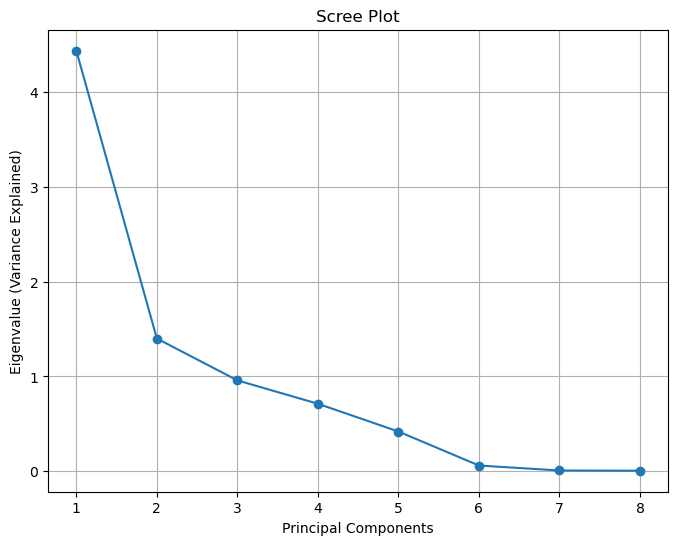

In [13]:
# Plot the scree plot
plt.figure(figsize=(8,6))
plt.plot(range(1, len(eigenvalues)+1), eigenvalues, marker='o', linestyle='-')
plt.title('Scree Plot')
plt.xlabel('Principal Components')
plt.ylabel('Eigenvalue (Variance Explained)')
plt.xticks(range(1, len(eigenvalues)+1))
plt.grid(True)
plt.show()

PCA/Factor Analysis is used for two main reasons: 1) Advanced data exploration and 2) Dimension reduction. In the former a scree plot does not have much use, except to determine if it is a healthy analysis by confirming the presence of the arm and elbow shape. In the latter case, there are 3 rules on how to select the optimal number of principal components, one such rule being the elbow point. In this case we note that PC 6 is where the elbow takes place, since PC 7 has a low contribution.

In [14]:
# Display the variance and cumulative variance of each PC/Factor
pca.eigenvalues_summary

,eigenvalue,% of variance,% of variance (cumulative)
component,,,
0,4.439,55.49%,55.49%
1,1.401,17.51%,73.00%
2,0.959,11.98%,84.98%
3,0.712,8.90%,93.88%
4,0.419,5.23%,99.11%
5,0.059,0.74%,99.86%
6,0.007,0.09%,99.94%
7,0.005,0.06%,100.00%


From this summary table we could invoke two more rules for dimension reduction. Based on the scree plot we would consider the first 6 PC, based on the eigenvalue higher than 1 we would use the first 2 PC, based on cumulative variance higher than threshold (80%) we would consider the first 3 PC.

#### Column contributions

Here we need to study how each PC is being constructed or rather how each column/variable contributes towards each PC.

In [15]:
column_contributions = pca.column_contributions_.iloc[:, 0] # Getting for the first PC
column_contributions_sorted = column_contributions.sort_values(ascending=False)
column_contributions_sorted

variable
EndYearOfFirstDegree      0.199604
FirstStartYear            0.195077
StartYearOfFirstDegree    0.195033
CurrentLevel              0.123299
CurrentDuration           0.111120
CurrentStartYear          0.106315
FirstDuration             0.054229
FirstLevel                0.015323
Name: 0, dtype: float64

In [16]:
pca.column_contributions_

component,0,1,2,3,4,5,6,7
variable,,,,,,,,
StartYearOfFirstDegree,0.195033,0.043117,0.007922,0.024739,0.080566,0.199850,0.370775,0.077998
EndYearOfFirstDegree,0.199604,0.035637,0.004888,0.025275,0.073831,0.113524,0.459654,0.087586
CurrentStartYear,0.106315,0.333108,0.058568,0.000723,0.005471,0.000655,0.088233,0.406929
CurrentDuration,0.111120,0.318411,0.056564,0.000314,0.009018,0.000028,0.077554,0.426991
FirstStartYear,0.195077,0.036826,0.001126,0.025616,0.053435,0.684016,0.003695,0.000210
FirstDuration,0.054229,0.069811,0.154967,0.720432,0.000382,0.000122,0.000013,0.000044
CurrentLevel,0.123299,0.068647,0.031243,0.005806,0.770079,0.000639,0.000062,0.000225
FirstLevel,0.015323,0.094444,0.684722,0.197094,0.007218,0.001166,0.000015,0.000019


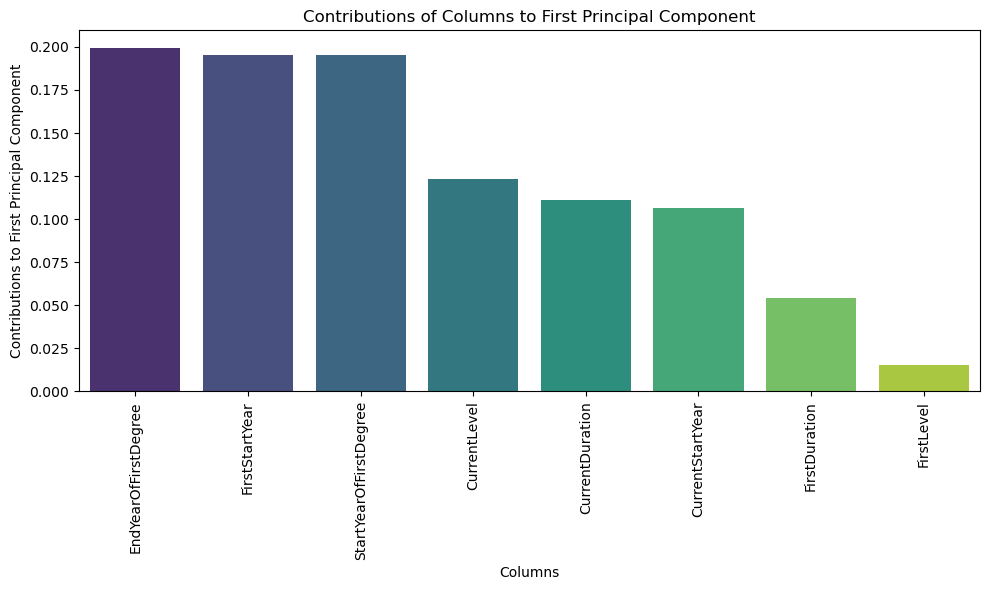

In [17]:
# Plot as a histogram
import seaborn as sns

plt.figure(figsize=(10,6))
sns.barplot(x=column_contributions_sorted.index, y=column_contributions_sorted.values, palette='viridis',
            hue=column_contributions_sorted.index, legend=False)
plt.xticks(rotation=90)
plt.xlabel('Columns')
plt.ylabel('Contributions to First Principal Component')
plt.title('Contributions of Columns to First Principal Component')
plt.tight_layout()
plt.show()


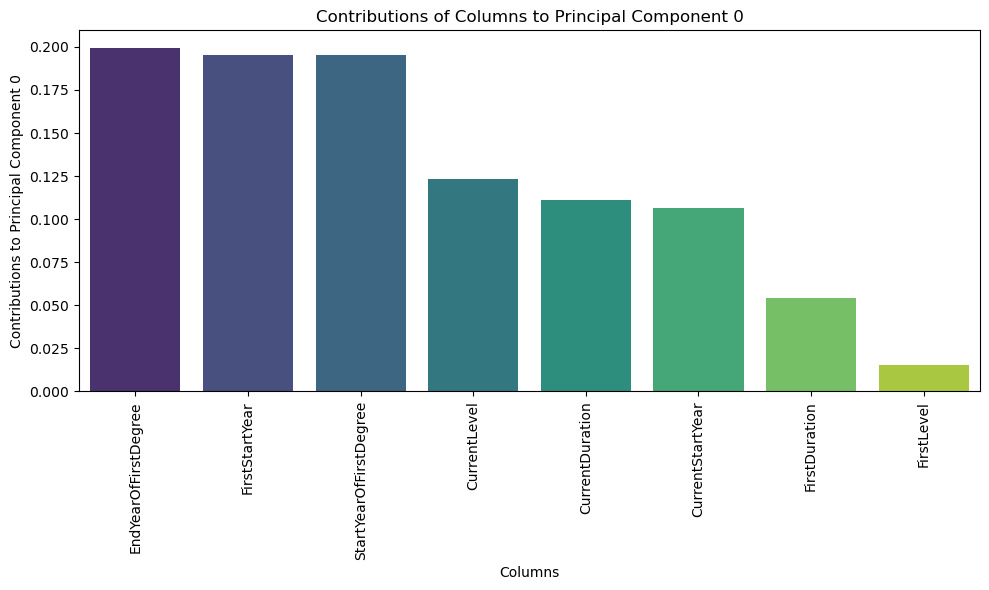

In [18]:
# Wrap the display in a function
def plot_column_contributions(model, pc_index):
    import seaborn as sns

    column_contributions = model.column_contributions_.iloc[:, pc_index]
    column_contributions_sorted = column_contributions.sort_values(ascending=False)

    plt.figure(figsize=(10,6))
    sns.barplot(x=column_contributions_sorted.index, y=column_contributions_sorted.values, palette='viridis',
                hue=column_contributions_sorted.index, legend=False)
    plt.xticks(rotation=90)
    plt.xlabel('Columns')
    plt.ylabel(f'Contributions to Principal Component {pc_index}')
    plt.title(f'Contributions of Columns to Principal Component {pc_index}')
    plt.tight_layout()
    plt.show()

plot_column_contributions(pca, 0)

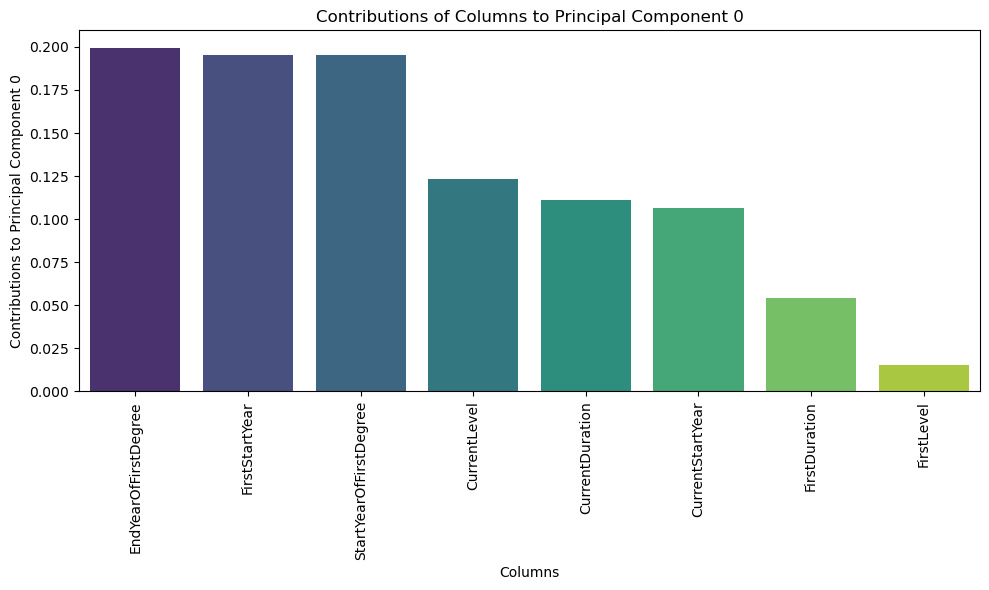

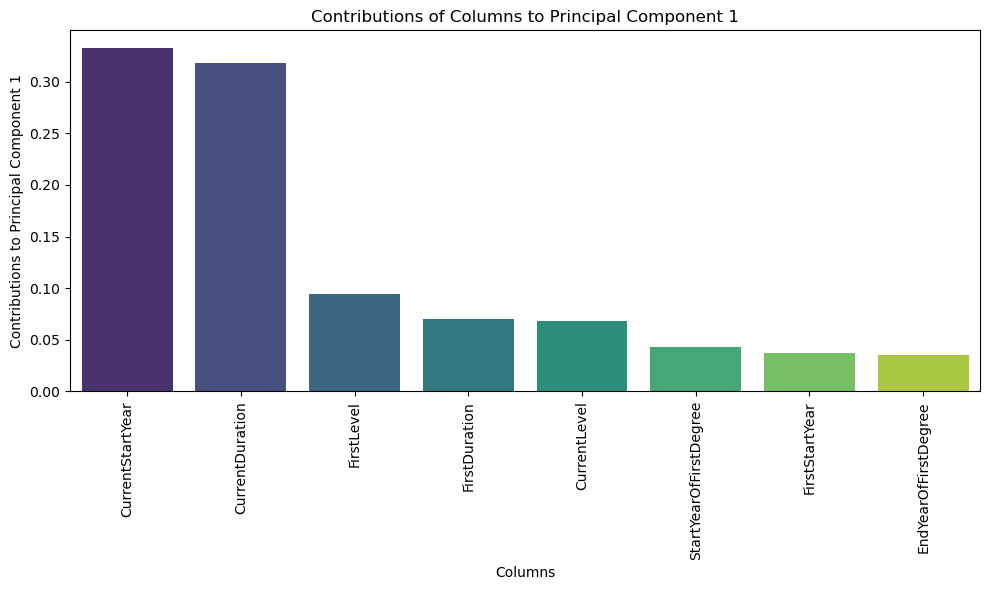

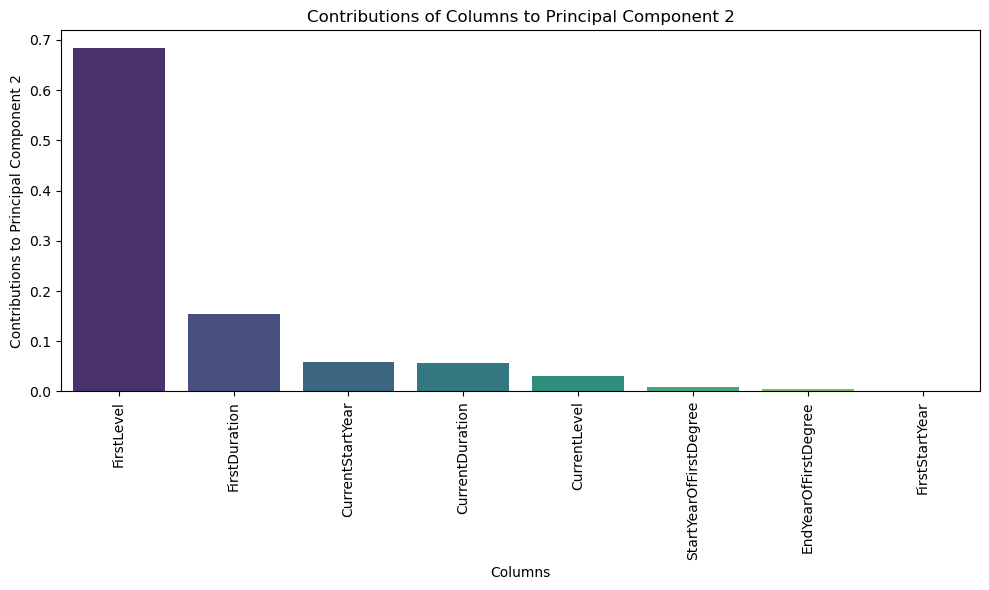

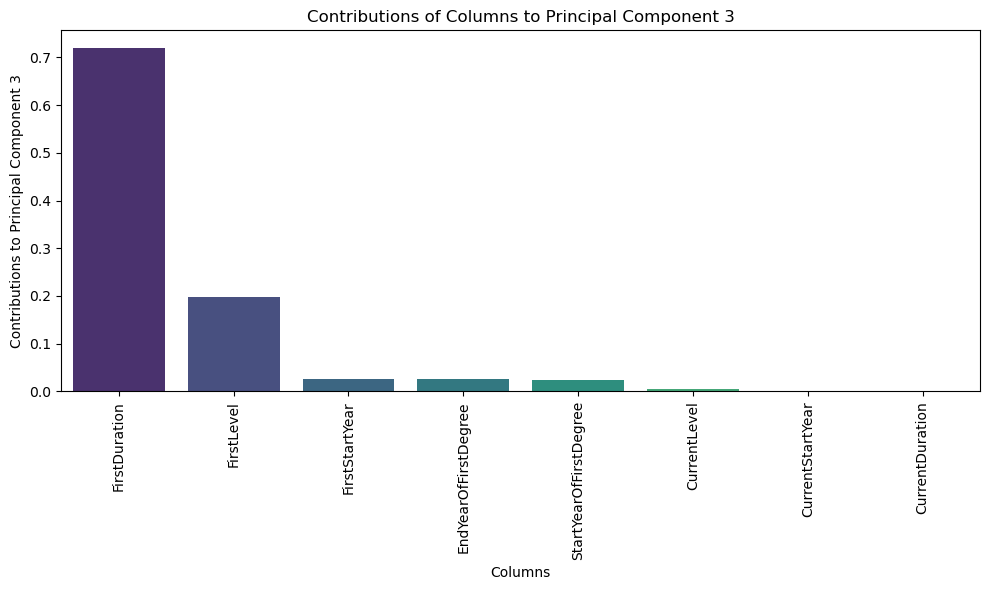

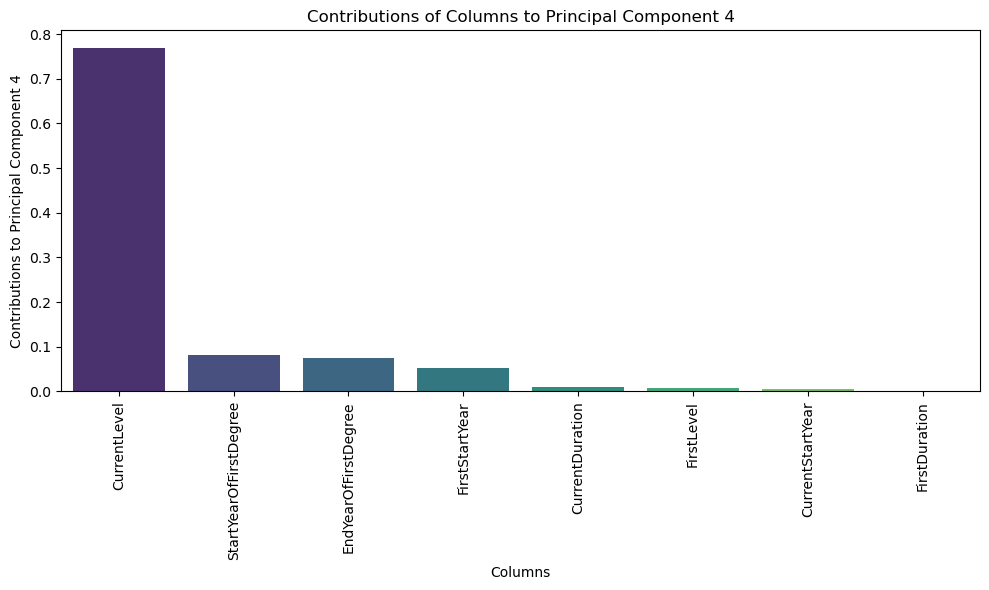

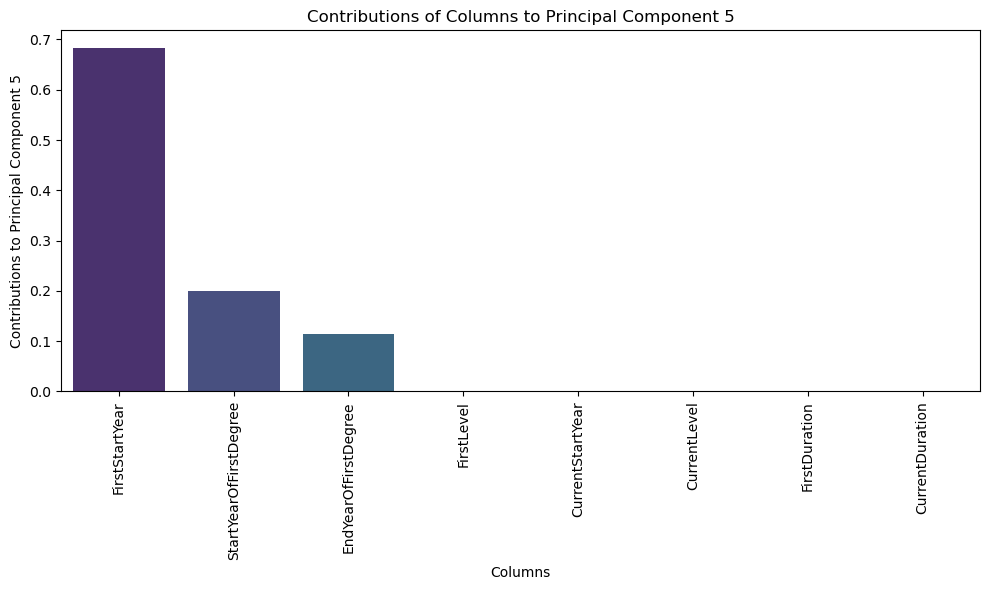

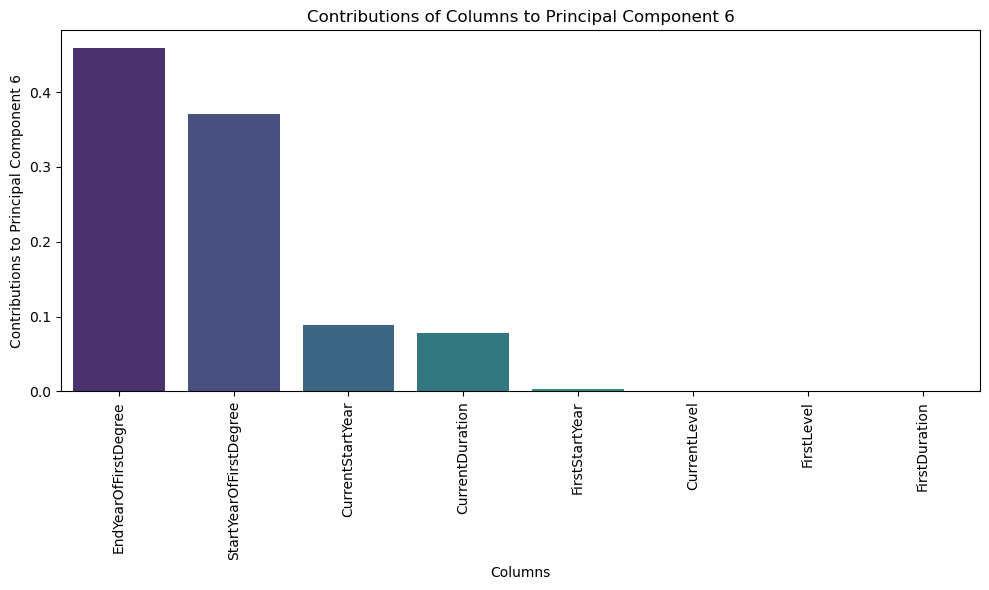

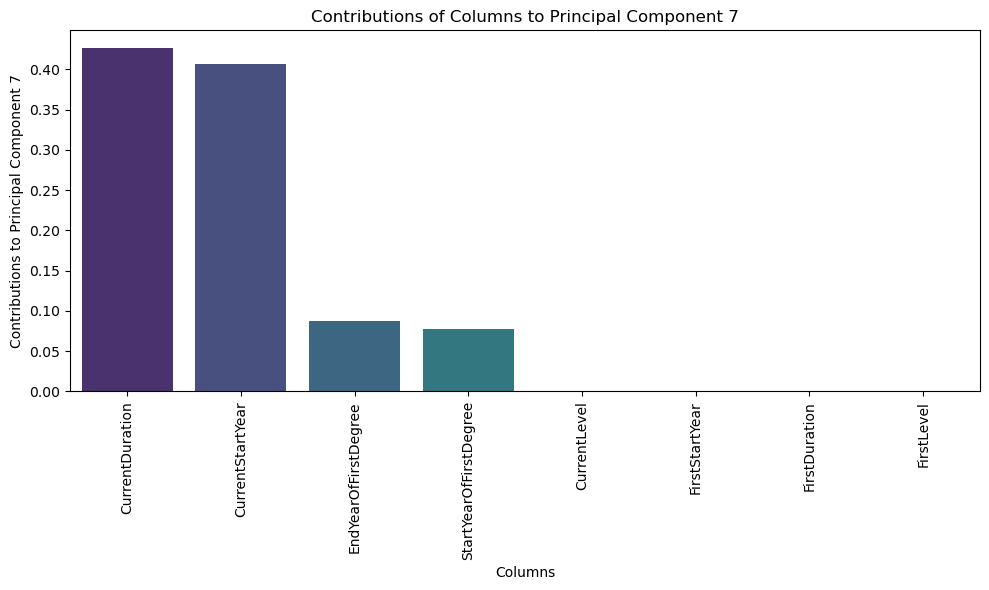

In [19]:
# Display for all PC
for i in range(0, n_components_max, 1):
    plot_column_contributions(pca, i)

#### Correlation Circle

In [20]:
# Extract column coordinates
column_coordinates = pca.column_coordinates_

# Display
print('Coordinates of columns')
column_coordinates

Coordinates of columns


component,0,1,2,3,4,5,6,7
variable,,,,,,,,
StartYearOfFirstDegree,-0.930505,0.245746,-0.087141,0.132695,-0.183643,-0.109025,0.050996,-0.018877
EndYearOfFirstDegree,-0.941344,0.223416,-0.068448,0.134124,-0.175800,-0.082171,-0.056781,0.020004
CurrentStartYear,-0.687007,-0.683053,0.236936,0.022681,0.047854,-0.006240,0.024877,0.043118
CurrentDuration,0.702361,0.667815,-0.232846,-0.014958,-0.061440,0.001293,0.023323,0.044168
FirstStartYear,-0.930608,0.227110,-0.032853,0.135027,-0.149559,0.201700,0.005091,-0.000978
FirstDuration,0.490659,-0.312698,-0.385408,0.716078,0.012640,0.002695,-0.000301,-0.000446
CurrentLevel,0.739851,-0.310079,0.173053,-0.064286,-0.567761,0.006164,-0.000657,-0.001014
FirstLevel,0.260817,0.363705,0.810136,0.374542,0.054967,-0.008328,0.000319,-0.000291


In [21]:
# Plotting the correlation circle
def plot_correlation_circle(model, pc_a):
    import numpy as np

    column_coords = model.column_coordinates_.iloc[:, pc_a:pc_a+2]

    column_coords_normalized = column_coords / np.sqrt((column_coords ** 2).sum(axis=0))

    plt.figure(figsize=(8,8))
    ax = plt.gca()

    circle = plt.Circle((0,0), 1, color='blue', fill=False)
    ax.add_artist(circle)

    # Plot variables/columns as vectors
    for i, (x,y) in enumerate(column_coords_normalized.values):
        plt.arrow(0,0, x,y, color='red', alpha=0.5, head_width=0.05, head_length=0.05)
        plt.text(x, y, column_coords_normalized.index[i], color='black', fontsize=12, ha='center', va='center')

    # Set axis limits
    plt.xlim(-1.1, 1.1)
    plt.ylim(-1.1, 1.1)

    # Add labels and title
    plt.xlabel(f'Principal Component (PC{pc_a})')
    plt.ylabel(f'Principal Component (PC{pc_a+1})')
    plt.title('Correlation circle')
    plt.grid(True)
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)
    plt.show()

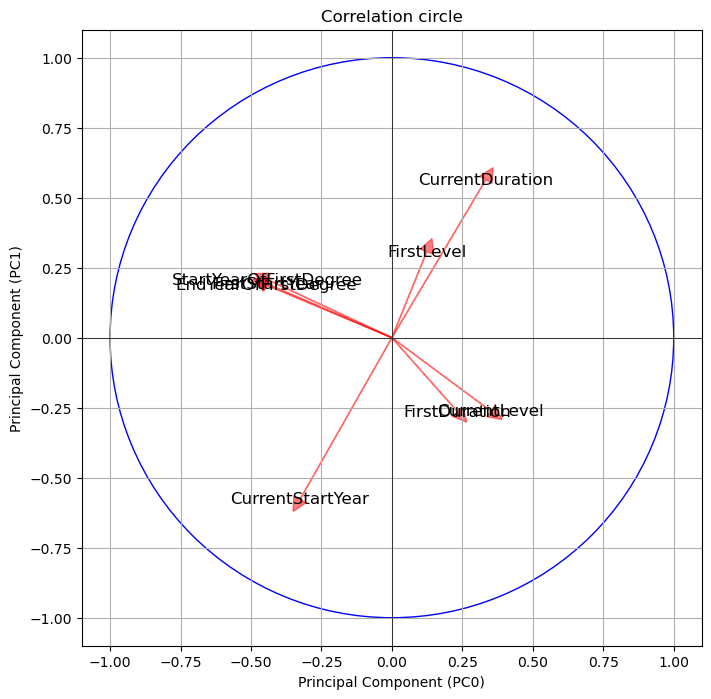

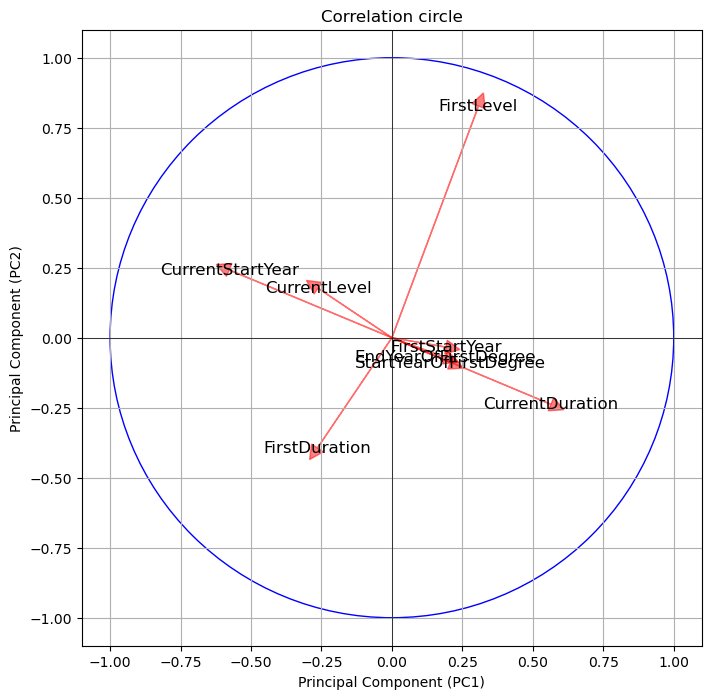

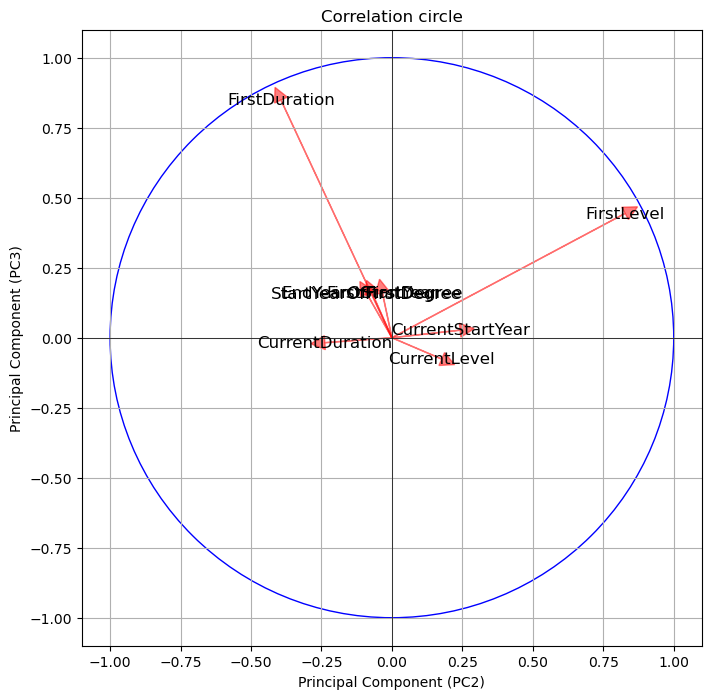

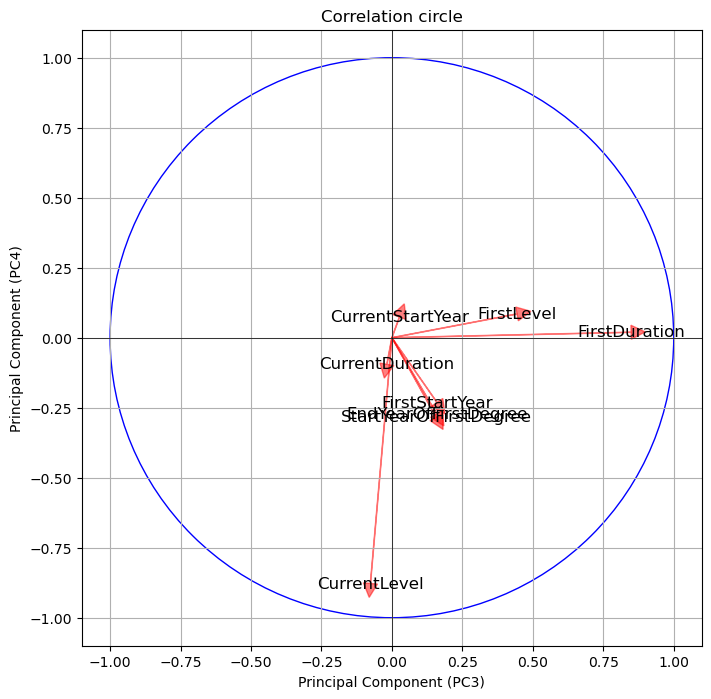

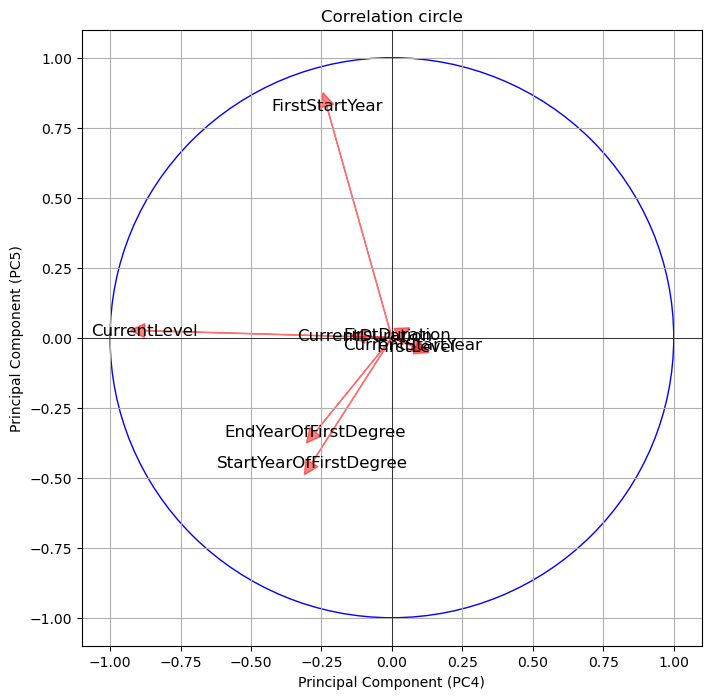

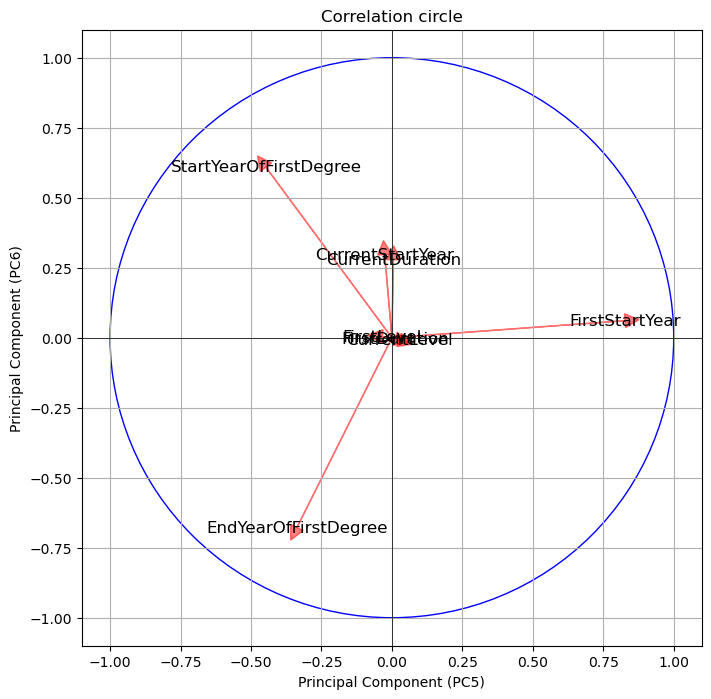

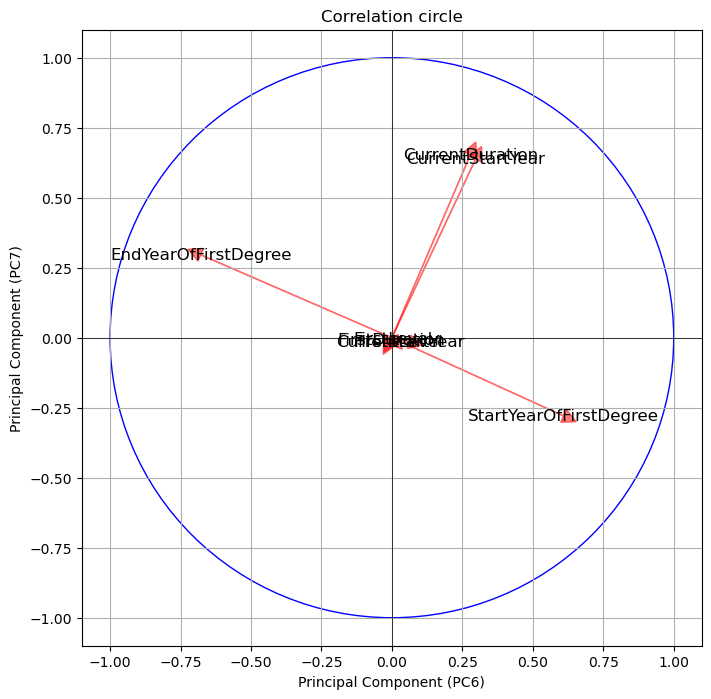

In [22]:
for i in range(0, n_components_max-1, 1):
    plot_correlation_circle(pca, i)

#### Individuals

In [23]:
# Get row coordinates
row_coords = pca.row_coordinates(df)
row_coords

component,0,1,2,3,4,5,6,7
0,-2.066034,0.337281,0.010910,-0.105660,0.301477,0.000952,-0.004443,-0.031303
1,-2.046791,0.344861,-0.011456,-0.073992,0.299255,0.001537,0.004111,-0.011161
2,-1.051231,0.775242,-0.609471,0.445580,0.405045,0.012858,-0.031470,-0.060897
3,-2.123762,0.314543,0.078007,-0.200663,0.308142,-0.000803,-0.030105,-0.091727
4,-2.067807,-0.124319,0.140016,-0.057440,0.458258,-0.018489,0.037386,0.039570
...,...,...,...,...,...,...,...,...
132,1.053568,0.297872,0.030523,-0.758871,-0.878121,0.003037,-0.019705,-0.044955
133,2.601208,-1.296164,0.673786,-1.466526,0.430987,0.906111,0.076511,0.087025
134,2.009640,-1.277533,0.099868,-0.246064,0.831630,1.905693,0.099978,-0.049484
135,3.258006,-0.704831,-1.412315,1.887911,-0.215638,0.052629,-0.095538,-0.007932


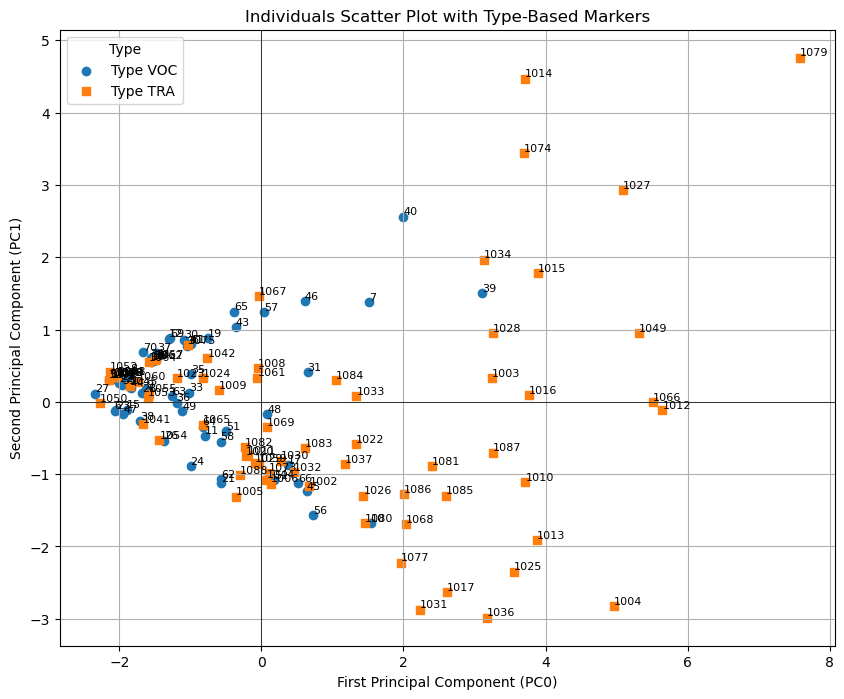

In [24]:
# Add the 'Type' column to the row coordinates for coloring
row_coords['Obs'] = df['Obs']
row_coords['Type'] = df['Type']

# Define a marker mapping for each 'Type'
marker_map = {
    'VOC': 'o',  # Circle
    'TRA': 's',  # Square
}

# Create a scatter plot with different markers for each 'Type'
plt.figure(figsize=(10, 8))

for type_value, marker in marker_map.items():
    subset = row_coords[row_coords['Type'] == type_value]
    plt.scatter(subset[0], subset[1], marker=marker, label=f'Type {type_value}')

for i, (x,y) in enumerate(row_coords.iloc[:,:2].values):
    plt.text(x, y, row_coords.iloc[i]['Obs'], fontsize=8, ha='left', va='bottom')

# Customize the plot
plt.xlabel('First Principal Component (PC0)')
plt.ylabel('Second Principal Component (PC1)')
plt.title('Individuals Scatter Plot with Type-Based Markers')
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.legend(title='Type')
plt.show()

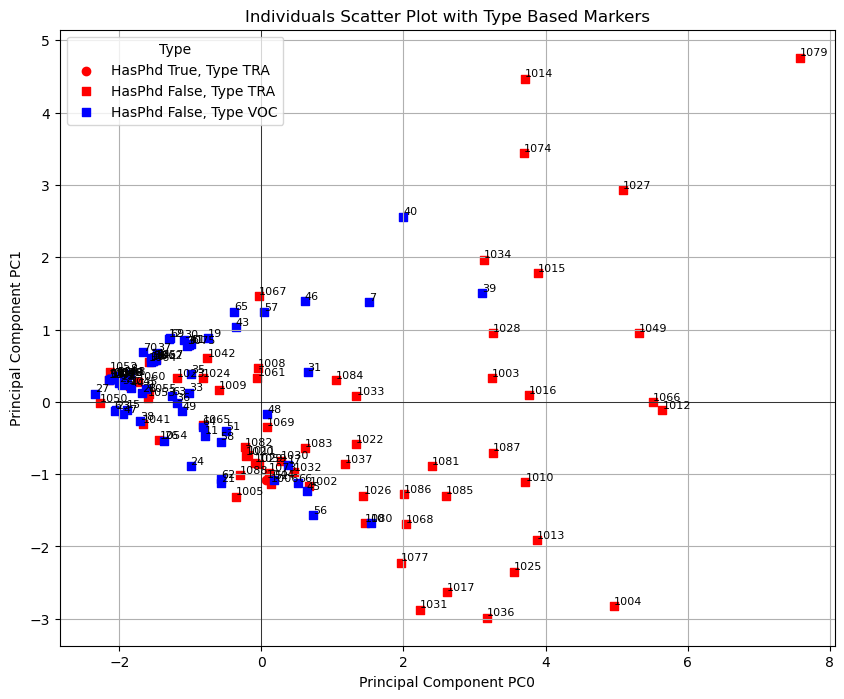

In [25]:
# Add additional information
row_coords['Obs'] = df['Obs']
row_coords['Type'] = df['Type']
row_coords['HasPhd'] = df['HasPhd']

# Define a color mapping
color_map = {
    'TRA': 'red',
    'VOC': 'blue'
}

# Define a marker mapping
marker_map = {
    True: 'o', # Circle
    False: 's' # Square
}

# Create a scatter plot
plt.figure(figsize=(10,8))

for type, color in color_map.items():
    for msc, marker in marker_map.items():
        subset = row_coords[(row_coords['HasPhd'] == msc) & (row_coords['Type']==type)]
        if not subset.empty:
            plt.scatter(subset[0], subset[1], color=color, marker=marker, label=f'HasPhd {msc}, Type {type}')
            

for i, (x,y) in enumerate(row_coords.iloc[:,:2].values):
    plt.text(x, y, row_coords.iloc[i]['Obs'], fontsize=8, ha='left', va='bottom')

plt.xlabel('Principal Component PC0')
plt.ylabel('Principal Component PC1')
plt.title('Individuals Scatter Plot with Type Based Markers')
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.legend(title='Type')
plt.show()

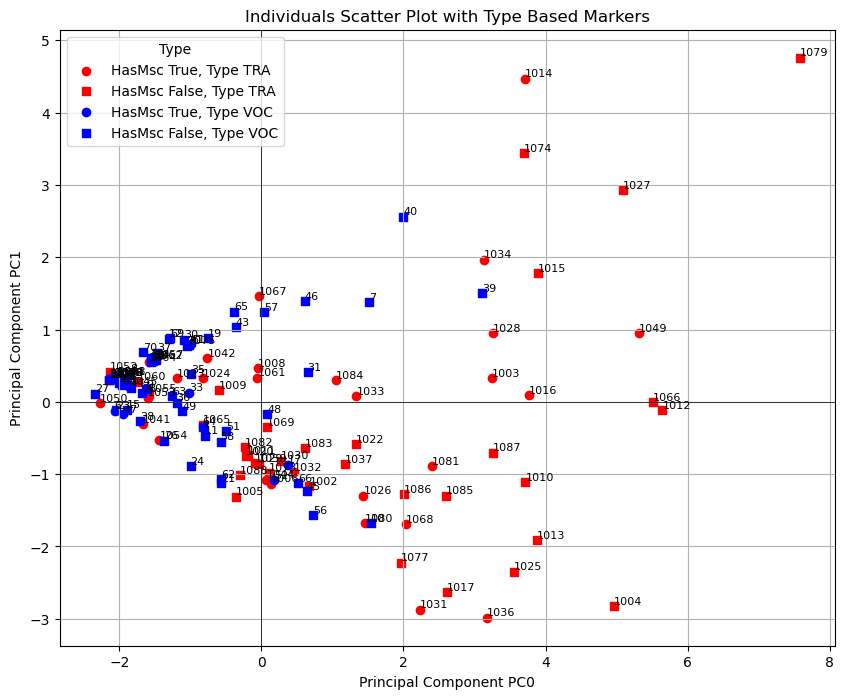

In [26]:
# Add additional information
row_coords['Obs'] = df['Obs']
row_coords['Type'] = df['Type']
row_coords['HasMsc'] = df['HasMsc']

# Define a color mapping
color_map = {
    'TRA': 'red',
    'VOC': 'blue'
}

# Define a marker mapping
marker_map = {
    True: 'o', # Circle
    False: 's' # Square
}

# Create a scatter plot
plt.figure(figsize=(10,8))

for type, color in color_map.items():
    for msc, marker in marker_map.items():
        subset = row_coords[(row_coords['HasMsc'] == msc) & (row_coords['Type']==type)]
        if not subset.empty:
            plt.scatter(subset[0], subset[1], color=color, marker=marker, label=f'HasMsc {msc}, Type {type}')
            

for i, (x,y) in enumerate(row_coords.iloc[:,:2].values):
    plt.text(x, y, row_coords.iloc[i]['Obs'], fontsize=8, ha='left', va='bottom')

plt.xlabel('Principal Component PC0')
plt.ylabel('Principal Component PC1')
plt.title('Individuals Scatter Plot with Type Based Markers')
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.legend(title='Type')
plt.show()

# Case-Study 02: KDD Cup 99 Dimension Reduction

Recall the KDD Cup 99 dataset which was explored and cleaned in ML01. We shall use PCA to reduce the dimension (width) of this dataset.

## Data acquisition

In [27]:
# Import some libraries
import os
import pandas as pd

# Load the dataset
df = pd.read_pickle(os.path.join('data','kddcup99','cleaned.pkl'))

# Preview the structure
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1063085 entries, 0 to 4898430
Data columns (total 43 columns):
 #   Column                       Non-Null Count    Dtype   
---  ------                       --------------    -----   
 0   duration                     1063085 non-null  int64   
 1   protocol_type                1063085 non-null  category
 2   service                      1063085 non-null  category
 3   flag                         1063085 non-null  category
 4   src_bytes                    1063085 non-null  int64   
 5   dst_bytes                    1063085 non-null  int64   
 6   land                         1063085 non-null  category
 7   wrong_fragment               1063085 non-null  int64   
 8   urgent                       1063085 non-null  int64   
 9   hot                          1063085 non-null  int64   
 10  num_failed_logins            1063085 non-null  int64   
 11  logged_in                    1063085 non-null  category
 12  num_compromised              1063

## Data exploration

In [28]:
categorical = []
numerical = []

for col in df.columns.to_list():
    if df[col].dtype=='category':
        categorical.append(col)
    else:
        numerical.append(col)

categorical.remove('class')
categorical.remove('attack_category')
numerical.remove('is_attack')

print('categorical: ', categorical)
print('numerical: ', numerical)

categorical:  ['protocol_type', 'service', 'flag', 'land', 'logged_in', 'is_host_login', 'is_guest_login']
numerical:  ['duration', 'src_bytes', 'dst_bytes', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate']


In [29]:
# Checking the unique values
for col in categorical:
    print(col, df[col].unique())

protocol_type ['tcp', 'udp']
Categories (2, object): ['tcp', 'udp']
service ['http', 'smtp', 'domain_u', 'auth', 'finger', ..., 'http_2784', 'harvest', 'aol', 'tftp_u', 'http_8001']
Length: 64
Categories (64, object): ['IRC', 'X11', 'Z39_50', 'aol', ..., 'uucp', 'uucp_path', 'vmnet', 'whois']
flag ['SF', 'S2', 'S1', 'S3', 'OTH', ..., 'RSTO', 'S0', 'RSTR', 'RSTOS0', 'SH']
Length: 11
Categories (11, object): ['OTH', 'REJ', 'RSTO', 'RSTOS0', ..., 'S2', 'S3', 'SF', 'SH']
land [0, 1]
Categories (2, int64): [0, 1]
logged_in [1, 0]
Categories (2, int64): [0, 1]
is_host_login [0, 1]
Categories (2, int64): [0, 1]
is_guest_login [0, 1]
Categories (2, int64): [0, 1]


In [30]:
# Remove binary categorical columns/variables from list
categorical.remove('land')
categorical.remove('logged_in')
categorical.remove('is_host_login')
categorical.remove('is_guest_login')

print('categorical: ', categorical)

categorical:  ['protocol_type', 'service', 'flag']


In [31]:
# Check the dataset structure
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1063085 entries, 0 to 4898430
Data columns (total 43 columns):
 #   Column                       Non-Null Count    Dtype   
---  ------                       --------------    -----   
 0   duration                     1063085 non-null  int64   
 1   protocol_type                1063085 non-null  category
 2   service                      1063085 non-null  category
 3   flag                         1063085 non-null  category
 4   src_bytes                    1063085 non-null  int64   
 5   dst_bytes                    1063085 non-null  int64   
 6   land                         1063085 non-null  category
 7   wrong_fragment               1063085 non-null  int64   
 8   urgent                       1063085 non-null  int64   
 9   hot                          1063085 non-null  int64   
 10  num_failed_logins            1063085 non-null  int64   
 11  logged_in                    1063085 non-null  category
 12  num_compromised              1063

## Data preprocessing

### One-hot encoding

In [32]:
# Change bool types to integers
df['land'] = df['land'].astype('int64')
df['logged_in'] = df['logged_in'].astype('int64')
df['is_host_login'] = df['is_host_login'].astype('int64')
df['is_guest_login'] = df['is_guest_login'].astype('int64')

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1063085 entries, 0 to 4898430
Data columns (total 43 columns):
 #   Column                       Non-Null Count    Dtype   
---  ------                       --------------    -----   
 0   duration                     1063085 non-null  int64   
 1   protocol_type                1063085 non-null  category
 2   service                      1063085 non-null  category
 3   flag                         1063085 non-null  category
 4   src_bytes                    1063085 non-null  int64   
 5   dst_bytes                    1063085 non-null  int64   
 6   land                         1063085 non-null  int64   
 7   wrong_fragment               1063085 non-null  int64   
 8   urgent                       1063085 non-null  int64   
 9   hot                          1063085 non-null  int64   
 10  num_failed_logins            1063085 non-null  int64   
 11  logged_in                    1063085 non-null  int64   
 12  num_compromised              1063

In [33]:
df = pd.get_dummies(data=df, columns=categorical)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1063085 entries, 0 to 4898430
Columns: 117 entries, duration to flag_SH
dtypes: bool(78), category(2), float64(15), int64(22)
memory usage: 389.3 MB


In [34]:
for col in df.columns.to_list():
    print(col, ' ', df[col].dtype)

duration   int64
src_bytes   int64
dst_bytes   int64
land   int64
wrong_fragment   int64
urgent   int64
hot   int64
num_failed_logins   int64
logged_in   int64
num_compromised   int64
root_shell   int64
su_attempted   int64
num_root   int64
num_file_creations   int64
num_shells   int64
num_access_files   int64
is_host_login   int64
is_guest_login   int64
count   int64
srv_count   int64
serror_rate   float64
srv_serror_rate   float64
rerror_rate   float64
srv_rerror_rate   float64
same_srv_rate   float64
diff_srv_rate   float64
srv_diff_host_rate   float64
dst_host_count   int64
dst_host_srv_count   int64
dst_host_same_srv_rate   float64
dst_host_diff_srv_rate   float64
dst_host_same_src_port_rate   float64
dst_host_srv_diff_host_rate   float64
dst_host_serror_rate   float64
dst_host_srv_serror_rate   float64
dst_host_rerror_rate   float64
dst_host_srv_rerror_rate   float64
class   category
is_attack   bool
attack_category   category
protocol_type_tcp   bool
protocol_type_udp   bool
ser

### Data normalization

In [35]:
from sklearn.preprocessing import MinMaxScaler

# Get list of columns to scale
cols = df.columns.to_list()
cols.remove('class')
cols.remove('attack_category')
cols.remove('is_attack')

target = 'is_attack'

scaler = MinMaxScaler()
df[cols] = scaler.fit_transform(df[cols])

In [36]:
# Verify the range of values
df.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
count,1.063085e+06,1.063085e+06,1.063085e+06,1.063085e+06,1.063085e+06,1.063085e+06,1.063085e+06,1.063085e+06,1.063085e+06,1.063085e+06,...,1.063085e+06,1.063085e+06,1.063085e+06,1.063085e+06,1.063085e+06,1.063085e+06,1.063085e+06,1.063085e+06,1.063085e+06,1.063085e+06
mean,2.338488e-03,4.275171e-06,3.762254e-06,2.445712e-05,8.585077e-04,2.620406e-06,7.128237e-04,2.953668e-05,6.371739e-01,4.827934e-06,...,7.097927e-02,4.787952e-03,1.147603e-04,2.657360e-03,1.914852e-01,5.004304e-04,1.505054e-04,4.703293e-05,7.289474e-01,2.850195e-04
std,2.278297e-02,1.464415e-03,1.056963e-03,4.945356e-03,2.925917e-02,1.106260e-03,1.302618e-02,3.133626e-03,4.808155e-01,1.106842e-03,...,2.567903e-01,6.902921e-02,1.071202e-02,5.148108e-02,3.934701e-01,2.236471e-02,1.226715e-02,6.857898e-03,4.445034e-01,1.688012e-02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,1.586998e-07,2.542106e-07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
75%,0.000000e+00,2.217449e-07,1.334415e-06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
max,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


### PCA

In [37]:
# Check the number of columns
cols.__len__()

# P.S. there are 114 predictor variables and then the target variable

114

In [38]:
# Load library and do PCA
import prince

# Compute PCA
pca = prince.PCA(n_components=60)
pca = pca.fit(df[cols])

# Fit transform
df_pca = pca.fit_transform(df[cols])

# Attach the target variable
df_pca[target] = df[target]
df_pca.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1063085 entries, 0 to 4898430
Data columns (total 61 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   0          1063085 non-null  float64
 1   1          1063085 non-null  float64
 2   2          1063085 non-null  float64
 3   3          1063085 non-null  float64
 4   4          1063085 non-null  float64
 5   5          1063085 non-null  float64
 6   6          1063085 non-null  float64
 7   7          1063085 non-null  float64
 8   8          1063085 non-null  float64
 9   9          1063085 non-null  float64
 10  10         1063085 non-null  float64
 11  11         1063085 non-null  float64
 12  12         1063085 non-null  float64
 13  13         1063085 non-null  float64
 14  14         1063085 non-null  float64
 15  15         1063085 non-null  float64
 16  16         1063085 non-null  float64
 17  17         1063085 non-null  float64
 18  18         1063085 non-null  float64
 19  19   

In [39]:
# Get the eigen values
eigenvalues = pca.eigenvalues_

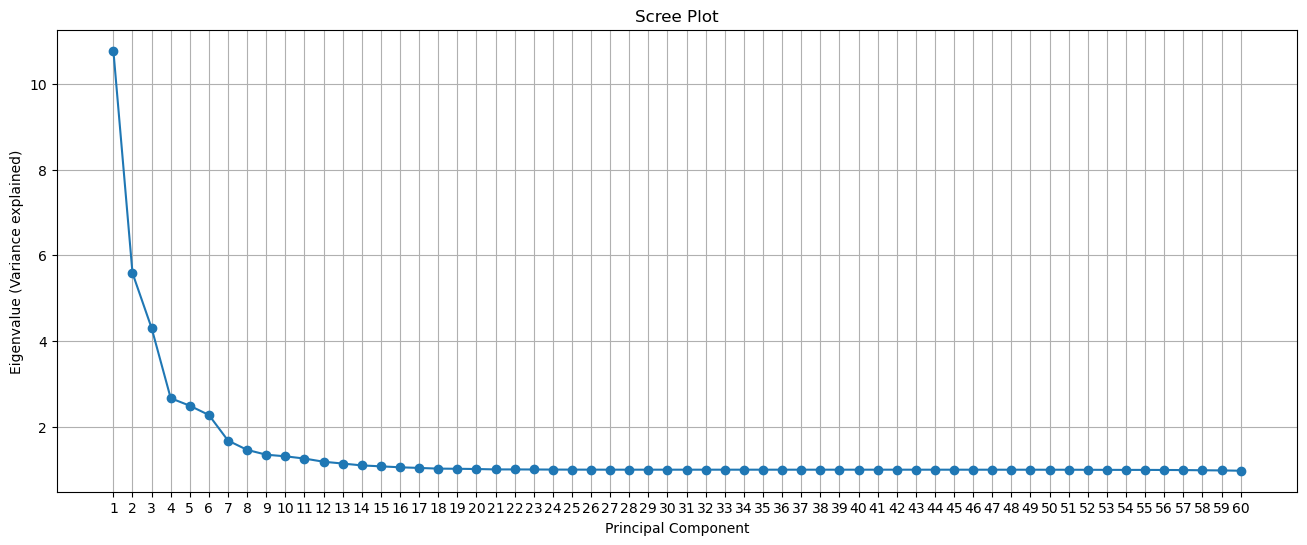

In [40]:
# Plot the scree plot
import matplotlib.pyplot as plt

plt.figure(figsize=(16,6))
plt.plot(range(1, len(eigenvalues)+1), eigenvalues, marker='o', linestyle='-')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue (Variance explained)')
plt.xticks(range(1, len(eigenvalues)+1))
plt.grid(True)
plt.show()

In [41]:
# Check the variance
pca.eigenvalues_summary

,eigenvalue,% of variance,% of variance (cumulative)
component,,,
0,10.772,9.45%,9.45%
1,5.586,4.90%,14.35%
2,4.304,3.78%,18.12%
3,2.668,2.34%,20.47%
4,2.493,2.19%,22.65%
5,2.276,2.00%,24.65%
6,1.680,1.47%,26.12%
7,1.463,1.28%,27.40%
8,1.350,1.18%,28.59%


From the scree plot we note that at the 7th PC there is an elbow.

From the eigen values summary we note that the first 50 PC have an eigen value higher or equal to 1.

Through prior experimentation it was noted that the first 60 PC lead to a cummulative variance just shy of 75%

Therefore we shall undertake 4 experiments, first using all 114 variables, then 7PC, then 50PC then 60PC and compare results

## Model creation

### Exp 01: Using all columns

In [42]:
# Split the dataset
from sklearn.model_selection import train_test_split

X1 = df[cols]
y1 = df[target]

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.3, stratify=y1, random_state=123)

print(X_train1.shape)
print(X_test1.shape)

(744159, 114)
(318926, 114)


In [43]:
# Create the model
from sklearn.ensemble import RandomForestClassifier

model1 = RandomForestClassifier(n_estimators=50, max_depth=50, random_state=123, 
                                class_weight='balanced')
model1.fit(X_train1, y_train1)

RandomForestClassifier(class_weight='balanced', max_depth=50, n_estimators=50,
                       random_state=123)

In [44]:
# Evaluate on test
from sklearn.metrics import classification_report, confusion_matrix

pred1 = model1.predict(X_test1)

print(confusion_matrix(y_true=y_test1, y_pred=pred1))
print(classification_report(y_true=y_test1, y_pred=pred1, digits=4))

[[242501     15]
 [    54  76356]]
              precision    recall  f1-score   support

       False     0.9998    0.9999    0.9999    242516
        True     0.9998    0.9993    0.9995     76410

    accuracy                         0.9998    318926
   macro avg     0.9998    0.9996    0.9997    318926
weighted avg     0.9998    0.9998    0.9998    318926



### Exp 02: 7 PC

### Exp 03: 50 PC

### Exp 04: 60 PC